In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
coffee_ratings = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv')

### Exploring Dataframe

In [3]:
coffee_ratings.head(5)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
coffee_no_duplicates = coffee_ratings.drop_duplicates()

In [5]:
coffee_no_duplicates.shape

(1339, 43)

In [6]:
coffee_ratings.shape

(1339, 43)

In [7]:
len(coffee_no_duplicates) == len(coffee_ratings)

True

In [8]:
coffee_ratings.keys()

Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

### Analysing Relevant Variables

In [9]:
coffee_ratings[['total_cup_points','species','owner','farm_name','ico_number','aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture']]

,total_cup_points,species,owner,farm_name,ico_number,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture
0,90.58,Arabica,metad plc,metad plc,2014/2015,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,0.12
1,89.92,Arabica,metad plc,metad plc,2014/2015,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,0.12
2,89.75,Arabica,grounds for health admin,"san marcos barrancas ""san cristobal cuch",NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,0.00
3,89.00,Arabica,yidnekachew dabessa,yidnekachew dabessa coffee plantation,NaN,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,0.11
4,88.83,Arabica,metad plc,metad plc,2014/2015,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,78.75,Robusta,luis robles,robustasa,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,0.00
1335,78.08,Robusta,luis robles,robustasa,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,0.00
1336,77.17,Robusta,james moore,fazenda cazengo,NaN,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,0.00
1337,75.08,Robusta,cafe politico,NaN,14-1118-2014-0087,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,0.10


### Adding Unique Identifier 

In [10]:
coffee_ratings['id'] = pd.Series(list(range(1,len(coffee_ratings)+1)))

In [11]:
coffee_ratings.columns

Index(['total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters',
       'id'],
      dtype='object')

In [12]:
coffee_ratings = coffee_ratings[['id','total_cup_points', 'species', 'owner', 'country_of_origin',
       'farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude',
       'region', 'producer', 'number_of_bags', 'bag_weight',
       'in_country_partner', 'harvest_year', 'grading_date', 'owner_1',
       'variety', 'processing_method', 'aroma', 'flavor', 'aftertaste',
       'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness',
       'cupper_points', 'moisture', 'category_one_defects', 'quakers', 'color',
       'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']]

In [13]:
coffee_ratings.head()

,id,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [16]:
coffee_ratings[['id','country_of_origin','total_cup_points','species','variety','owner','farm_name','aroma', 'flavor', 'aftertaste',
                'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness','cupper_points', 'moisture']]

,id,country_of_origin,total_cup_points,species,variety,owner,farm_name,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture
0,1,Ethiopia,90.58,Arabica,NaN,metad plc,metad plc,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,0.12
1,2,Ethiopia,89.92,Arabica,Other,metad plc,metad plc,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,0.12
2,3,Guatemala,89.75,Arabica,Bourbon,grounds for health admin,"san marcos barrancas ""san cristobal cuch",8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,0.00
3,4,Ethiopia,89.00,Arabica,NaN,yidnekachew dabessa,yidnekachew dabessa coffee plantation,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,0.11
4,5,Ethiopia,88.83,Arabica,Other,metad plc,metad plc,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1335,Ecuador,78.75,Robusta,NaN,luis robles,robustasa,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,0.00
1335,1336,Ecuador,78.08,Robusta,NaN,luis robles,robustasa,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,0.00
1336,1337,United States,77.17,Robusta,NaN,james moore,fazenda cazengo,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,0.00
1337,1338,India,75.08,Robusta,NaN,cafe politico,NaN,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,0.10


### Missing Values / Number NaN 

In [17]:
coffee_ratings.isna().sum()

id                          0
total_cup_points            0
species                     0
owner                       7
country_of_origin           1
farm_name                 359
lot_number               1063
mill                      318
ico_number                157
company                   209
altitude                  226
region                     59
producer                  232
number_of_bags              0
bag_weight                  0
in_country_partner          0
harvest_year               47
grading_date                0
owner_1                     7
variety                   226
processing_method         170
aroma                       0
flavor                      0
aftertaste                  0
acidity                     0
body                        0
balance                     0
uniformity                  0
clean_cup                   0
sweetness                   0
cupper_points               0
moisture                    0
category_one_defects        0
quakers   

### We can discard certain columns due to the number of NaN
    * lot_number
    * farm_name may not needed because we have owner

### Coffee Variety totals

In [18]:
coffee_variety = coffee_ratings['variety'].sort_values().value_counts()
coffee_variety

Caturra                  256
Bourbon                  226
Typica                   211
Other                    110
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
SL34                       8
Pacamara                   8
Arusha                     6
Peaberry                   5
Mandheling                 3
Sumatra                    3
Blue Mountain              2
Java                       2
Ruiru 11                   2
Ethiopian Yirgacheffe      2
Pache Comun                1
Sulawesi                   1
Ethiopian Heirlooms        1
Marigojipe                 1
Sumatra Lintong            1
Moka Peaberry              1
Name: variety, dtype: int64

### Getting rid of outliers

In [19]:
#After visualizing the coffee "variety" we have seen extreme values on the left of total cup points.
#I just filter them.
coffee_ratings[(coffee_ratings['variety'] == 'Caturra') & (coffee_ratings['total_cup_points'] < 20)]

,id,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1310,1311,0.0,Arabica,bismarck castro,Honduras,los hicaques,103,cigrah s.a de c.v.,13-111-053,cigrah s.a de c.v,...,Green,2,"April 28th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0


In [20]:
coffee_ratings = coffee_ratings[(coffee_ratings['variety'] != 'Caturra') | (coffee_ratings['total_cup_points'] >= 20)]

### Coffee Variety

In [21]:
variety = coffee_ratings[coffee_ratings['variety'].isin(coffee_variety.index)]['variety']
variety

1         Other
2       Bourbon
4         Other
6         Other
9         Other
         ...   
1308    Caturra
1309     Catuai
1319      Other
1322      Other
1333     Arusha
Name: variety, Length: 1112, dtype: object

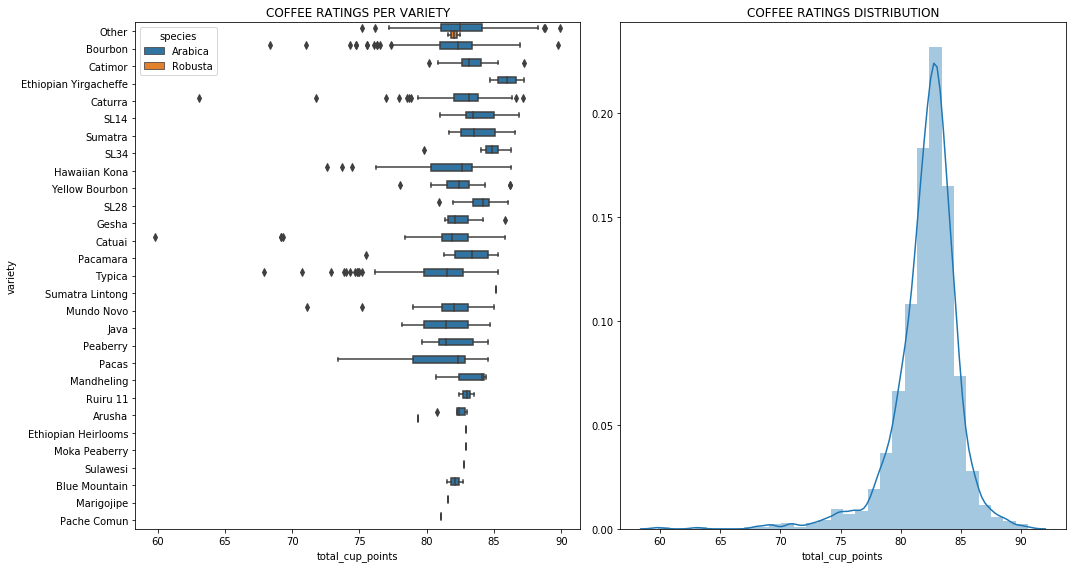

In [22]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

sns.boxplot(x=coffee_ratings['total_cup_points'] ,y=variety, data=coffee_ratings,hue=coffee_ratings['species'],ax=ax[0])

sns.distplot(coffee_ratings['total_cup_points'],bins=30 ,ax=ax[1])

ax[0].set_title('COFFEE RATINGS PER VARIETY')
ax[1].set_title('COFFEE RATINGS DISTRIBUTION')

plt.tight_layout()
plt.show()

### Best Varieties

In [25]:
best_variety = coffee_ratings[coffee_ratings['variety'] != 'Other']

In [26]:
best_variety.groupby(['country_of_origin','variety']).mean().sort_values(by='total_cup_points', ascending=False)[['total_cup_points']].head(5)

total_cup_points
country_of_origin variety                                
Taiwan            Sumatra                           86.58
Ethiopia          Ethiopian Yirgacheffe             85.96
Panama            Gesha                             85.83
Ethiopia          Caturra                           85.75
                  Typica                            85.33

### Analyzing Countries with at least 20 Samples of Coffee

In [27]:
countries = coffee_ratings['country_of_origin'].value_counts().sort_values(ascending=False).head(15)
countries

Mexico                          236
Colombia                        183
Guatemala                       181
Brazil                          132
Taiwan                           75
United States (Hawaii)           73
Honduras                         52
Costa Rica                       51
Ethiopia                         44
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         32
Nicaragua                        26
Kenya                            25
El Salvador                      21
Name: country_of_origin, dtype: int64

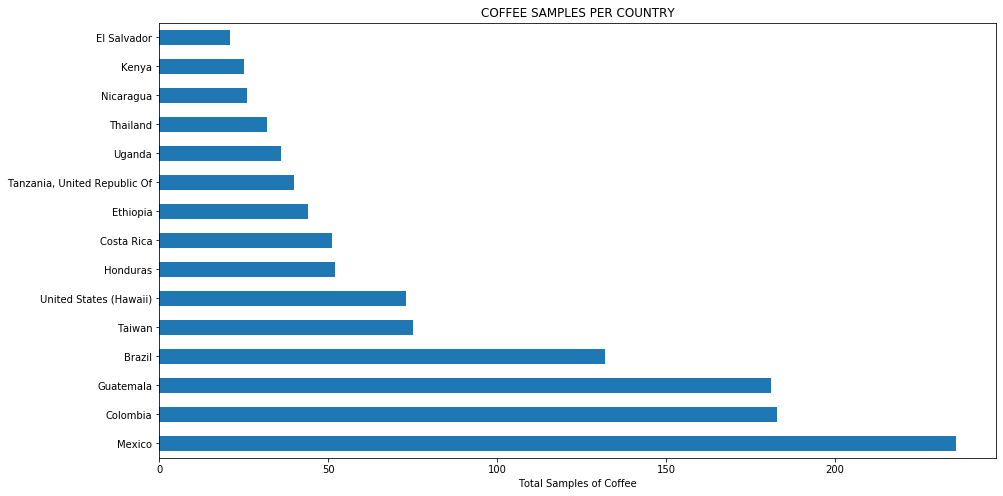

In [28]:
plt.figure(figsize=(15,8))
countries.plot(kind='barh',)
plt.xlabel('Total Samples of Coffee')
plt.title('COFFEE SAMPLES PER COUNTRY')
plt.show()

In [29]:
cfe = coffee_ratings[coffee_ratings["country_of_origin"].isin(countries.index)]

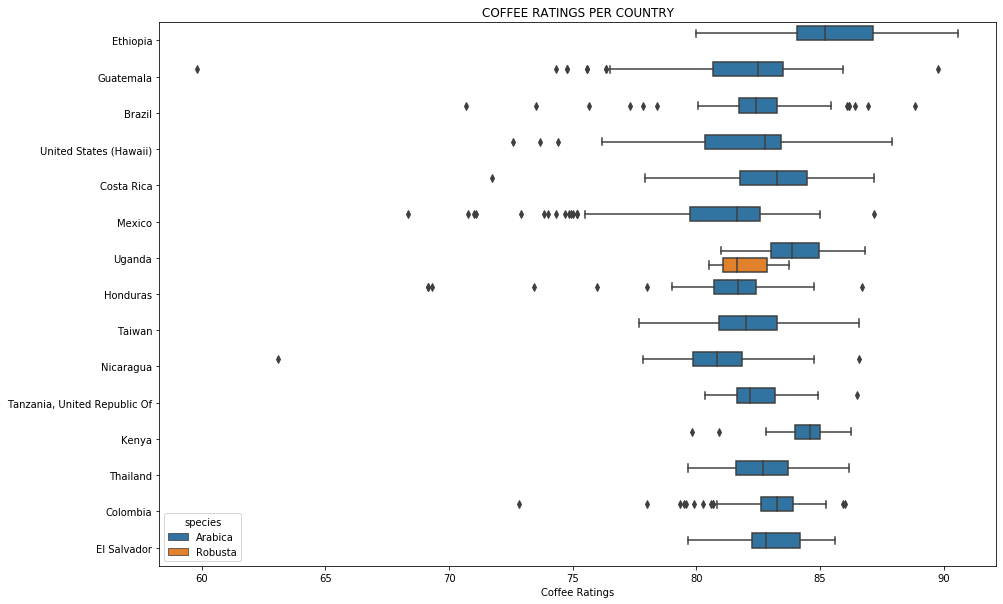

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(y=cfe["country_of_origin"], x=cfe['total_cup_points'],hue=cfe['species'])
plt.ylabel('')
plt.xlabel('Coffee Ratings')
plt.title('COFFEE RATINGS PER COUNTRY')
plt.show()

### Best Ratings Per Country

In [31]:
cfe.groupby('country_of_origin').mean().sort_values(by='total_cup_points', ascending=False).head(3)[['total_cup_points']]

,total_cup_points
country_of_origin,
Ethiopia,85.484091
Kenya,84.309600
Uganda,83.451944


### Analizing coffee Parameters

In [32]:
coffee_param = coffee_ratings[['aroma', 'flavor', 'aftertaste','acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness']]

In [33]:
coffee_param

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00
...,...,...,...,...,...,...,...,...,...
1334,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75
1335,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42
1336,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42
1337,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08


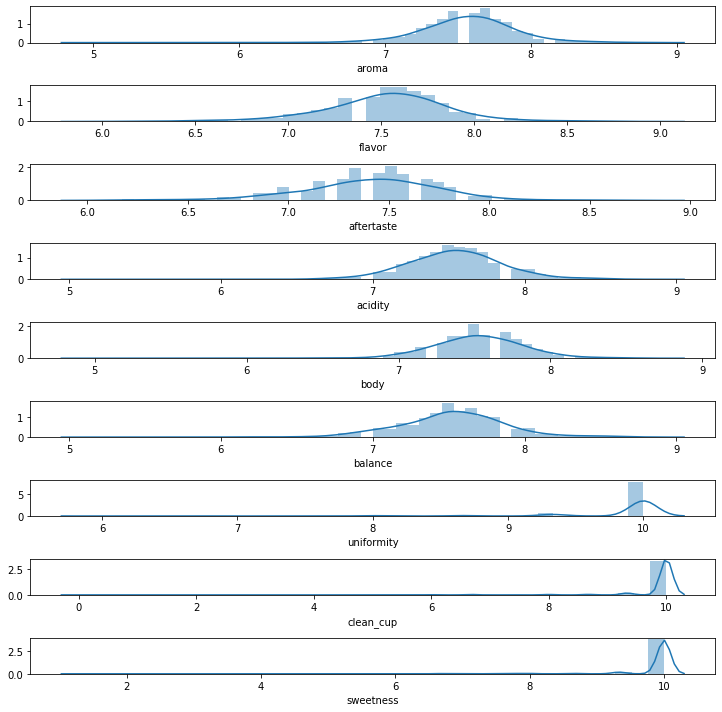

In [39]:
count = 0
fig, ax = plt.subplots(nrows =9, ncols =1, figsize=(10,10))

for param in coffee_param.columns:
    sns.distplot(coffee_param[param],kde_kws={'bw': 0.1},ax=ax[count])
    count = count + 1
    
plt.tight_layout()
plt.show()

In [40]:
params = coffee_param.describe().transpose().reset_index().set_index('index')[['mean','std']]
params

,mean,std
index,,
aroma,7.572362,0.315916
flavor,7.526046,0.341382
aftertaste,7.406614,0.350304
acidity,7.541338,0.319173
body,7.523117,0.307815
balance,7.523632,0.353630
uniformity,9.842227,0.485183
clean_cup,9.842459,0.715296
sweetness,9.864058,0.554207


###  Correlation Matrix

In [41]:
param_corr = coffee_param.corr()
param_corr

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness
aroma,1.000000,0.740314,0.694292,0.606602,0.529874,0.598973,0.137751,0.182289,0.018193
flavor,0.740314,1.000000,0.859529,0.745873,0.630419,0.719607,0.214387,0.268469,0.084677
aftertaste,0.694292,0.859529,1.000000,0.716019,0.633841,0.745644,0.209672,0.259728,0.060950
acidity,0.606602,0.745873,0.716019,1.000000,0.579856,0.633811,0.152783,0.139768,0.032372
body,0.529874,0.630419,0.633841,0.579856,1.000000,0.665433,0.078994,0.104058,0.033792
balance,0.598973,0.719607,0.745644,0.633811,0.665433,1.000000,0.207785,0.238942,0.081425
uniformity,0.137751,0.214387,0.209672,0.152783,0.078994,0.207785,1.000000,0.434271,0.303781
clean_cup,0.182289,0.268469,0.259728,0.139768,0.104058,0.238942,0.434271,1.000000,0.340525
sweetness,0.018193,0.084677,0.060950,0.032372,0.033792,0.081425,0.303781,0.340525,1.000000


### Showing only half of the matrix

In [42]:
df_corr = param_corr.where(np.tril(np.ones(coffee_param.shape)).astype(np.bool)[0:9,0:9])
df_corr

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness
aroma,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flavor,0.740314,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aftertaste,0.694292,0.859529,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
acidity,0.606602,0.745873,0.716019,1.000000,NaN,NaN,NaN,NaN,NaN
body,0.529874,0.630419,0.633841,0.579856,1.000000,NaN,NaN,NaN,NaN
balance,0.598973,0.719607,0.745644,0.633811,0.665433,1.000000,NaN,NaN,NaN
uniformity,0.137751,0.214387,0.209672,0.152783,0.078994,0.207785,1.000000,NaN,NaN
clean_cup,0.182289,0.268469,0.259728,0.139768,0.104058,0.238942,0.434271,1.000000,NaN
sweetness,0.018193,0.084677,0.060950,0.032372,0.033792,0.081425,0.303781,0.340525,1.0


### Plotting Heatmap

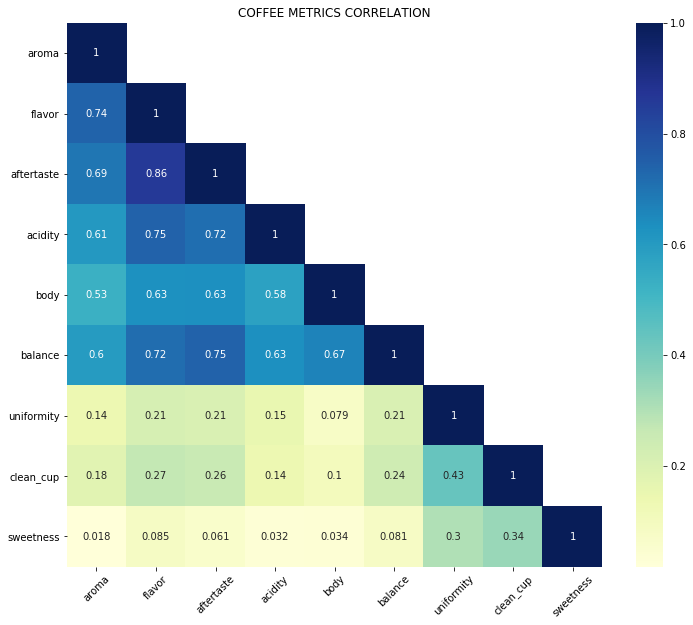

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True, cmap='YlGnBu')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('COFFEE METRICS CORRELATION')
plt.show()

### Analizing Coffee Altitude

In [44]:
coffee_ratings.head(1)

,id,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


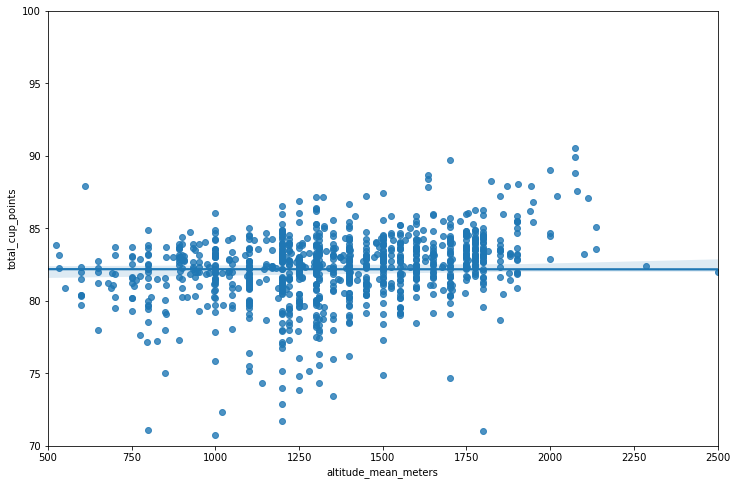

In [45]:
plt.figure(figsize=(12,8))
sns.regplot(x='altitude_mean_meters',y='total_cup_points',data=coffee_ratings)
plt.ylim(bottom=70, top=100)
plt.xlim(right=2500, left=500)
plt.show()

---

### Hypothesis Testing 1

In [46]:
# We are going test if altitude and total_cup_points are linearly correlated.

In [47]:
# y = b0 + b1*x
# total_cup_points = b0 + b1*altitude_mean_meters
# H0 - B1 = 0 - x and y are not linearly correlated
# H1 - B1 != 0 - x and y are linearly correlated

In [48]:
from scipy import stats
coffee_ratings = coffee_ratings[coffee_ratings['altitude_mean_meters'].notna()]

In [49]:
stats.linregress(x=coffee_ratings['altitude_mean_meters'], y=coffee_ratings['total_cup_points'])

LinregressResult(slope=-6.0930610168644185e-06, intercept=82.19451779277847, rvalue=-0.02012634288704617, pvalue=0.5033361400281966, stderr=9.101335392253554e-06)

In [50]:
# we set alpha = 0.05
# p-value >= alpha
# We can not reject the Null Hypothesis

### Hypothesis Testing 2

In [51]:
# H0 - Ethiopia total_cup_points mean <= Kenya total_cup_points mean
# H1 - Ethiopia total_cup_points mean > Kenya total_cup_points mean

In [52]:
ethiopia_ratings = coffee_ratings[coffee_ratings['country_of_origin'] == 'Ethiopia']['total_cup_points']

In [53]:
kenya_ratings = coffee_ratings[coffee_ratings['country_of_origin'] == 'Kenya']['total_cup_points']

In [54]:
stats.ttest_ind(ethiopia_ratings,kenya_ratings, equal_var = False)

Ttest_indResult(statistic=3.2171803397367453, pvalue=0.002261294031710333)

In [55]:
# we set alpha = 0.05
# This is one side test t-test and we should divide our p-value by 2
# p-values = 0.00226 / 2
# p-value < alpha

# t = (mean(X1) - mean(X2)) / x, x > 0
# and t = 3.067, so we can assume that mean(X1) is bigger
# therefore, we can reject null hypothesis

---

### Clustering k-means

In [56]:
import pandas as pd

### Data Frame only with Coffee Metrics

In [57]:
coffee_ratings[['aroma', 'flavor', 'aftertaste','acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness']]

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00
...,...,...,...,...,...,...,...,...,...
1331,7.67,7.67,7.50,7.33,7.58,7.50,10.00,10.00,7.42
1332,7.58,7.42,7.42,7.83,7.42,7.50,10.00,10.00,7.42
1333,7.92,7.50,7.42,7.42,7.42,7.42,9.33,10.00,7.58
1335,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42


### Clustering by Flavor, Acidity & Sweetness

In [58]:
#X = coffee_ratings[['aroma', 'flavor', 'aftertaste','acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness']]
X = coffee_ratings[['flavor','acidity','sweetness']]

In [59]:
X.head()

,flavor,acidity,sweetness
0,8.83,8.75,10.0
1,8.67,8.58,10.0
2,8.50,8.42,10.0
3,8.58,8.42,10.0
4,8.50,8.50,10.0


### Normalizing Data

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()

In [62]:
X_scaled = scaler.fit_transform(X)

In [63]:
pd.DataFrame(X_scaled)

,0,1,2
0,3.940634,3.883016,0.224528
1,3.456570,3.339289,0.224528
2,2.942253,2.827547,0.224528
3,3.184285,2.827547,0.224528
4,2.942253,3.083418,0.224528
...,...,...,...
1103,0.431174,-0.658701,-4.712364
1104,-0.325176,0.940495,-4.712364
1105,-0.083144,-0.370846,-4.406200
1106,0.431174,0.684623,-2.798840


### Clustering

In [64]:
from sklearn.cluster import KMeans

In [65]:
kmeans = KMeans(n_clusters=4,random_state=1234)

In [66]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [67]:
clusters = kmeans.predict(X_scaled)

In [68]:
pd.Series(clusters).value_counts()

0    583
1    256
2    227
3     42
dtype: int64

### Calculating Inertia

In [69]:
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=50,
                tol=0,
                algorithm="auto",
                random_state=1234)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

1121.1352414319344


In [70]:
# Different inertia for different K(number of clusters)

In [71]:
K = range(2, 20)
inertia = []

for k in range(2,20):
    
    kmeans = KMeans(n_clusters=k,
                    init="random",
                    n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                    max_iter=50,
                    tol=0,
                    algorithm="auto",
                    random_state=1234)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

print(inertia)

[2233.2421953834632, 1481.2519512851145, 1121.1352414319344, 953.5793360118384, 801.5305140332846, 711.7949899205241, 608.2474899829909, 555.9309722847158, 521.0483354598987, 482.50010961506644, 433.3119328452155, 411.21560244009106, 391.8629726865515, 366.2534315560793, 352.93969787174603, 349.1108954937024, 326.611760755805, 315.9363658515192]


### Visualize Elbow Method

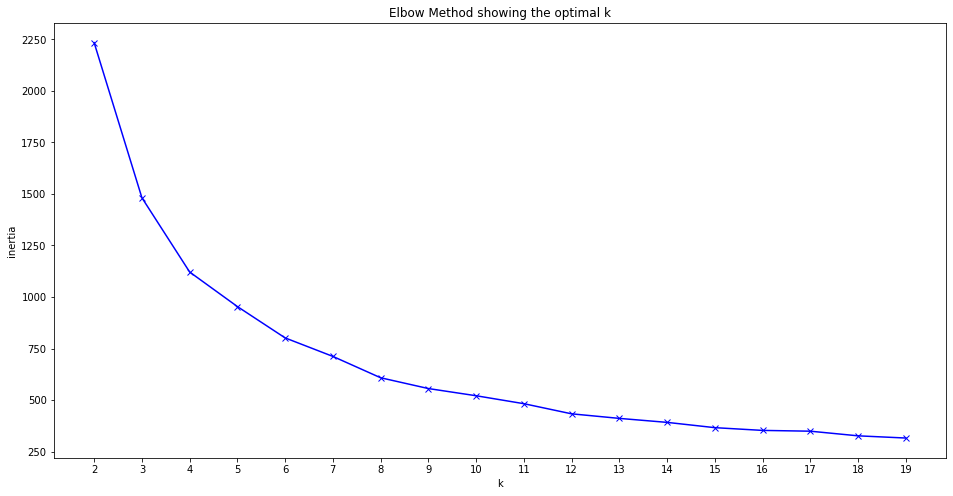

In [72]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')
plt.show()

#### Looking at the graph we decide that 4 cluster is our best fit

In [73]:
coffee_ratings['clusters'] = clusters

In [74]:
coffee_ratings = coffee_ratings.reset_index()

In [75]:
coffee_ratings.drop('index',inplace=True, axis=1)

In [76]:
coffee_ratings.groupby('clusters').mean()[['aroma', 'flavor', 'aftertaste','acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness']].sort_values('flavor')

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness
clusters,,,,,,,,,
1,7.289609,7.129687,7.045391,7.189336,7.264570,7.188359,9.799219,9.656133,9.963437
3,7.589524,7.450000,7.326190,7.499762,7.464762,7.355952,9.428333,9.222143,7.605714
0,7.593516,7.553791,7.429142,7.537170,7.529177,7.543945,9.924408,9.961046,9.979314
2,7.858370,7.922863,7.744141,7.930396,7.763040,7.826432,9.924890,9.950000,9.964626


### Coffee Recommender


In [89]:
def coffe_recommender(df, N = 4):
    print("insert values in the range 0 - 10")
    flavor = float(input("Flavor?:"))
    acidity = float(input("Acidity?:"))
    sweetness = float(input("Sweetness?:"))
    #Best coffe by euclidean distance
    dfAux = df[["acidity", "flavor", "sweetness"]]
    dfAux["minDistance"] = np.sqrt(np.power((df["flavor"] - flavor), 2) + np.power((df["acidity"] - acidity), 2) + 
                                   np.power((df["sweetness"] - sweetness), 2))
    
    #Other recomendations by cluster
    bestCoffeForMeIndex = dfAux["minDistance"].idxmin()
    bestClusterForMe = df.iloc[bestCoffeForMeIndex].clusters
    print("Your recomendation: \n")
    print(df.iloc[bestCoffeForMeIndex][["species", "country_of_origin", "producer", "region","flavor","acidity","sweetness"]])

    samples = df[df["clusters"] == bestClusterForMe].sample(N - 1)
    return samples

In [90]:
def another_recomm(df):
    print("You may also like...\n")
    print(df[["species", "owner", "country_of_origin"]])
    

---

### Coffee Recommender

In [96]:
other_rec = coffe_recommender(coffee_ratings)

insert values in the range 0 - 10
Flavor?:9
Acidity?:9
Sweetness?:9
Your recomendation: 

species                                                Arabica
country_of_origin                                     Ethiopia
producer             Bazen Agricultural & Industrial Dev't Plc
region                                                 oromiya
flavor                                                    8.67
acidity                                                   8.42
sweetness                                                 9.33
Name: 6, dtype: object


In [97]:
another_recomm(other_rec)

You may also like...

     species                           owner country_of_origin
32   Arabica        jacques pereira carneiro            Brazil
19   Arabica           roberto licona franco            Mexico
266  Arabica  exportadora de cafe condor s.a          Colombia
